# Medical Cost Personal Insurance Project

By Rushda Shabbir

Batch - DS2405

# Project Description

Health insurance is a type of insurance that covers medical expenses that arise due to an illness. These expenses could be related to hospitalisation costs, cost of medicines or doctor consultation fees. The main purpose of medical insurance is to receive the best medical care without any strain on your finances. Health insurance plans offer protection against high medical costs. It covers hospitalization expenses, day care procedures, domiciliary expenses, and ambulance charges, besides many others. Based on certain input features such as age , bmi,,no of dependents ,smoker ,region  medical insurance is calculated .

# Columns

•	age: age of primary beneficiary

•	sex: insurance contractor gender, female, male

•	bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, 
    objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9.
    
•	children: Number of children covered by health insurance / Number of dependents

•	smoker: Smoking

•	region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

•	charges: Individual medical costs billed by health insurance

#Predict : Can you accurately predict insurance costs?

Dataset Link-
https://github.com/dsrscientist/dataset4/blob/main/medical_cost_insurance.csv 



# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import scipy

import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV ,cross_val_score

from sklearn.preprocessing import MinMaxScaler , StandardScaler , LabelEncoder

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing dataset
df=pd.read_csv('Project Dataset\medical_cost_insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# Exploratory Data Analysis (EDA)

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
df.shape
print("no. rows",df.shape[0])
print("no. Columns",df.shape[1])

no. rows 1338
no. Columns 7


In [6]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [7]:
type(df)

pandas.core.frame.DataFrame

In [8]:
df.dtypes.to_frame(name='Data Type').reset_index().rename(columns={'index': 'Column Name'})

,Column Name,Data Type
0,age,int64
1,sex,object
2,bmi,float64
3,children,int64
4,smoker,object
5,region,object
6,charges,float64


In [9]:
#Groups columns by data type
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['age', 'children'], float64: ['bmi', 'charges'], object: ['sex', 'smoker', 'region']}

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Comment

This dataset contains 1338 rows and 7 columns. Out of which 1 is the target variable "charges" and the remaining 6 are independent variables described in the above section Columns.

In [11]:
#checking null values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [12]:
#Checks for specified values in DataFrame

df.isin([' ','NA','_']).sum().any()

False

In [13]:
df.columns[df.isna().any()]

Index([], dtype='object')

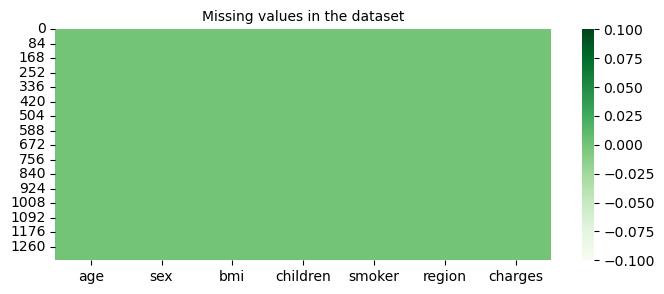

In [14]:
# Lets check null values visualize by using heatmap
plt.figure(figsize=(8,3))
sns.heatmap(df.isnull(), cmap='Greens')
plt.title('Missing values in the dataset', fontsize=10);

# comments
There are three different types of data (int64, float64, and object) present in the dataset.
There is no null values.

In [15]:
# Checking number of unique values in each column
df.nunique().to_frame("No. of unique values")

,No. of unique values
age,47
sex,2
bmi,548
children,6
smoker,2
region,4
charges,1337


These are the unique values present in the dataset. Since the target value is continuous we have to do a regression analysis.

# statistics Summary  of the numerical and non-numerical columns data

In [16]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [17]:
df.describe(exclude=[np.number])

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


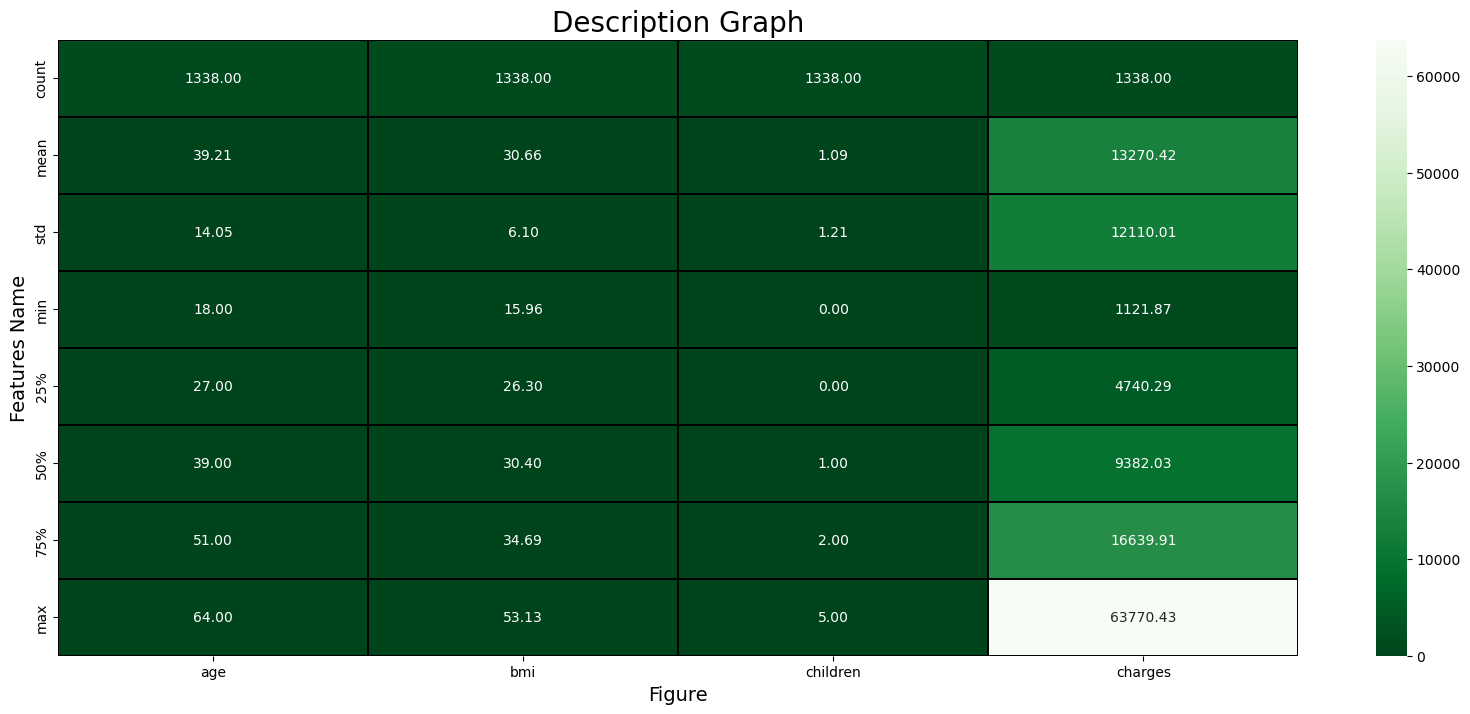

In [18]:
# Visualize statstics Summary of the data by heatmap
plt.figure(figsize = (20,8))
sns.heatmap(df.describe(),annot=True, fmt='0.2f', linewidth=0.2, linecolor='black', cmap='Greens_r')
plt.xlabel('Figure', fontsize=14)
plt.ylabel('Features Name', fontsize=14)
plt.title('Description Graph', fontsize=20)
plt.show()

# comments on Statstics summary
we can observe here in Numerical describe data

1. The counts of all the columns are the same which confirms there are no missing values in the dataset.
2. The mean value is greater than the median(50%) in 'age', 'bmi', 'children' columns which means the data is skewed to 
    right.

From the description of the non-numerical columns we can observe here.

1. Looking at count we can see that there are no null values. There are 1338 values in each column.
2. In column 'sex' and 'smoker' there are two unique values, while in 'region' there are 4 unique values.
3. The top value for sex is male, for smoker is no, and for region is southeast.

In [19]:
# Separate Numerical and Categorical columns
cat_col = []
num_col = []

for i in df.dtypes.index:
    if df.dtypes[i] == 'object':
        cat_col.append(i)
    else:
        num_col.append(i)
print(f"Categorical Columns: {cat_col}")
print(f"Numerical Columns: {num_col}")

Categorical Columns: ['sex', 'smoker', 'region']
Numerical Columns: ['age', 'bmi', 'children', 'charges']


# Data Visualization

Univariate Analysis

In [20]:
#Checking the value counts in categorical columns each column
for cat in cat_col:
    print(df[cat].value_counts())
    print('\n')

sex
male      676
female    662
Name: count, dtype: int64


smoker
no     1064
yes     274
Name: count, dtype: int64


region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64




In [21]:
#Checking the value counts in numerical columns each column
for num in num_col:
    print(df[num].value_counts())
    print('\n')

age
18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: count, dtype: int64


bmi
32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: count, Length: 548, dtype: int64


children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64


charges
1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455    1
              ..
7345.08400     1
26109.32905    1
28287.89766    1
1149.39590     1
29141.36030    1
Name: count, Length: 1337, dtype: int64




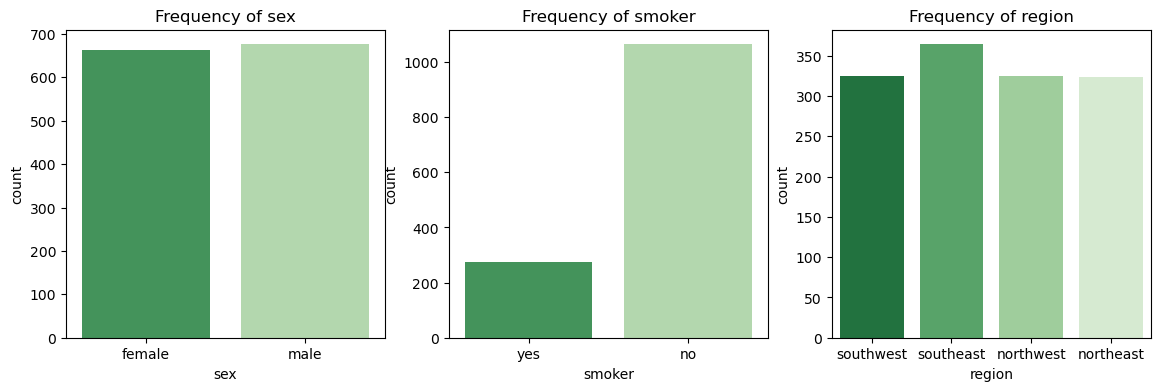

In [22]:
# Visualize the categorical variables
fig,axs = plt.subplots(1, 3, figsize=(14, 4))

for ax, column in zip(axs.flat, cat_col):
    sns.countplot(data=df, x=column, ax=ax, palette='Greens_r')
    ax.set_title(f"Frequency of {column}")

plt.subplots_adjust(hspace=0.5)
plt.show() 



# Comments
From the Frequency plot of each column, we can observe here

1. The total number of males and females are almost the same.
2. "Non-Smoker" count is high compared to "Yes Smoker" count by more than double.
3. The frequencies of the regions are approximately balanced, only southeast is slightly higher.



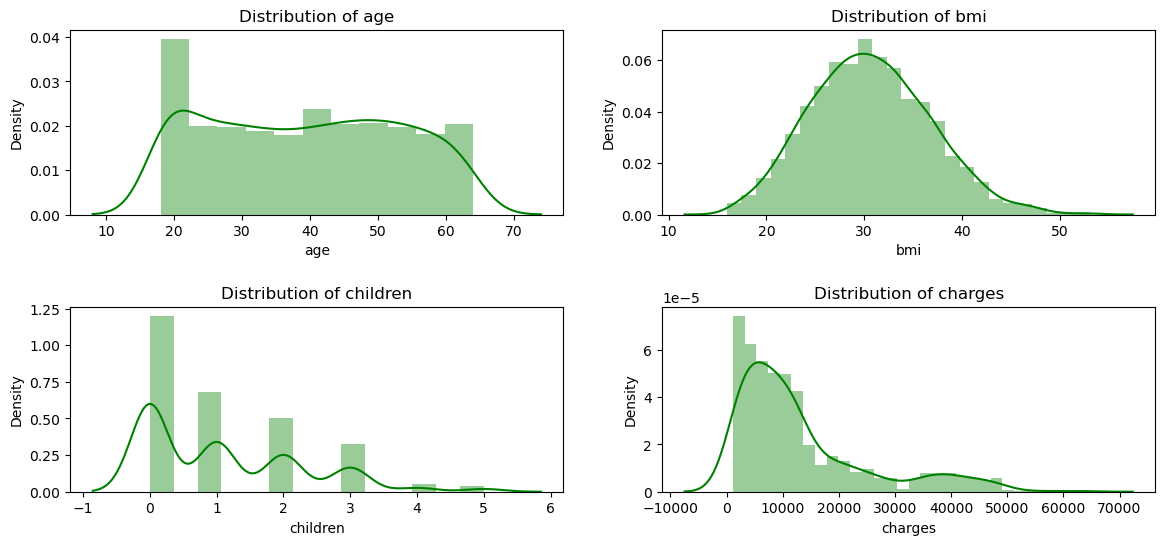

In [23]:
# Visualizing the distribution of the numerical columns 
fig, axs = plt.subplots(2, 2, figsize=(14, 6))
for ax, column in zip(axs.flat, num_col):
    sns.distplot( df[column], ax=ax,  color='g')
    ax.set_title(f"Distribution of {column}")

plt.subplots_adjust(hspace=0.5)
plt.show()

# comments

1. data almost looks normal in age and bmi but there may be outliers in the bmi column.
2. data in the column Charges (target variable) is skewed to the right. Later we will transform the data to obtain a normal distribution that will allow me to improve the predictive model.
3. data of the column children is discrete, with a majority of 0 children.



In [24]:
# Checking for skewness
num_skew = df[num_col].skew()
num_skew

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

# comments
Charges is the target variable, and children is a categorical variable, if here values will be numerical, so no need to remove skewness.

The target variable "Charges" has a right skewed distribution. We will apply a log transformation to obtain a normal distribution which can be beneficial for the application of linear regression models.


In [25]:
df['charges_cub']= np.cbrt(df['charges'])

In [26]:
# Apply Log transformation to the target variable 
df['charges_log'] = np.log(df['charges'])
display(df.head())

,age,sex,bmi,children,smoker,region,charges,charges_cub,charges_log
0,19,female,27.900,0,yes,southwest,16884.92400,25.654666,9.734176
1,18,male,33.770,1,no,southeast,1725.55230,11.994331,7.453302
2,28,male,33.000,3,no,southeast,4449.46200,16.447599,8.400538
3,33,male,22.705,0,no,northwest,21984.47061,28.013799,9.998092
4,32,male,28.880,0,no,northwest,3866.85520,15.695891,8.260197


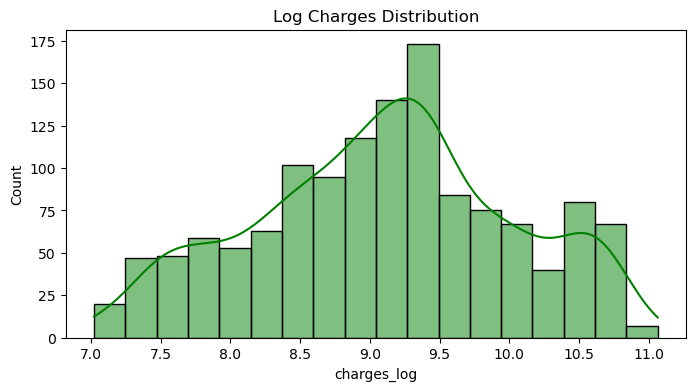

In [27]:
# Visualizing the Log Charges distribution
plt.figure(figsize=(8,4))
sns.histplot( df['charges_log'],  color='g',kde=True)
plt.title(f"Log Charges Distribution")
plt.show()

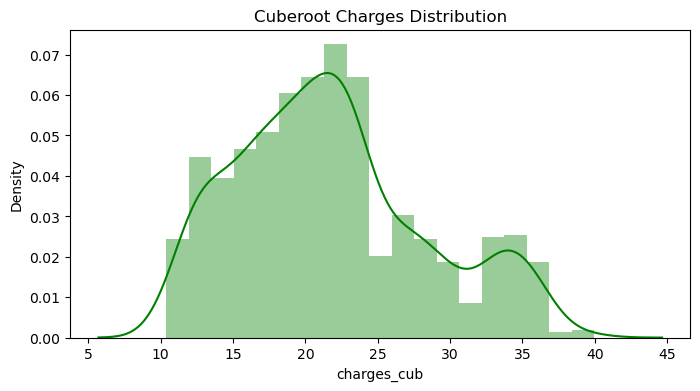

In [28]:
# Visualizing the Log Charges distribution
plt.figure(figsize=(8,4))
sns.distplot( df['charges_cub'],  color='g')
plt.title(f"Cuberoot Charges Distribution")
plt.show()

In [29]:
# here we get more relevent almost normal distribution by Log Transformation method so we drop this column
df.drop('charges_cub',axis=1,inplace=True)

In [30]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'charges_log'],
      dtype='object')

# Bivariate Analysis
Age Analysis

We are going to categorize by age to be able to analyze by segments the relationship of this variable with the medical expenses generated, later we will do a similar analysis with the variable bmi
Then, we will evaluate the relationship between the variables bmi and age


In [31]:
 #Age categories using pd.cut
df1=pd.DataFrame()
age_bins = [0, 9, 19, 29, 39, 49, 59, float('inf')]
age_labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69']
df['age_1'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)

# BMI categories using pd.cut
bmi_bins = [0, 18.5, 24.9, 29.9, float('inf')]
bmi_labels = ['under-weight', 'normal-weight', 'over-weight', 'obese']
df['bmi_1'] = pd.cut(df['bmi'], bins=bmi_bins, labels=bmi_labels)

In [32]:
# Grouping and counting
age_count= df.groupby(by='age_1').size()
sex_count = df.groupby(by='sex').size()
smoker_count = df.groupby(by='smoker').size()
region_count = df.groupby(by='region').size()
children_count = df.groupby(by='children').size()
bmi_count = df.groupby(by='bmi_1').size()
charges_count = df.groupby(by='charges').size()

In [33]:
print(age_count,'\n')
print(sex_count,'\n' )
print(smoker_count,'\n')
print(region_count,'\n')
print(children_count,'\n')
print(bmi_count,'\n')
print(charges_count,'\n')

age_1
0-9        0
10-19    137
20-29    280
30-39    257
40-49    279
50-59    271
60-69    114
dtype: int64 

sex
female    662
male      676
dtype: int64 

smoker
no     1064
yes     274
dtype: int64 

region
northeast    324
northwest    325
southeast    364
southwest    325
dtype: int64 

children
0    574
1    324
2    240
3    157
4     25
5     18
dtype: int64 

bmi_1
under-weight      21
normal-weight    221
over-weight      380
obese            716
dtype: int64 

charges
1121.87390     1
1131.50660     1
1135.94070     1
1136.39940     1
1137.01100     1
              ..
55135.40209    1
58571.07448    1
60021.39897    1
62592.87309    1
63770.42801    1
Length: 1337, dtype: int64 



age_1
20-29    280
40-49    279
50-59    271
30-39    257
10-19    137
60-69    114
0-9        0
Name: count, dtype: int64


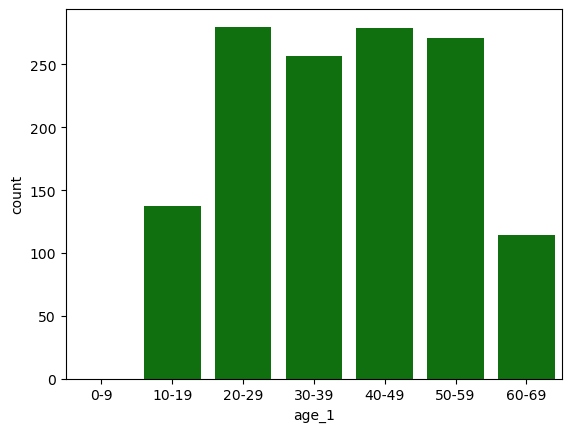

In [34]:
# Visualization the number of age_1

ax = sns.countplot (x='age_1', data=df,color='g')
print(df['age_1'].value_counts())

bmi_1
obese            716
over-weight      380
normal-weight    221
under-weight      21
Name: count, dtype: int64


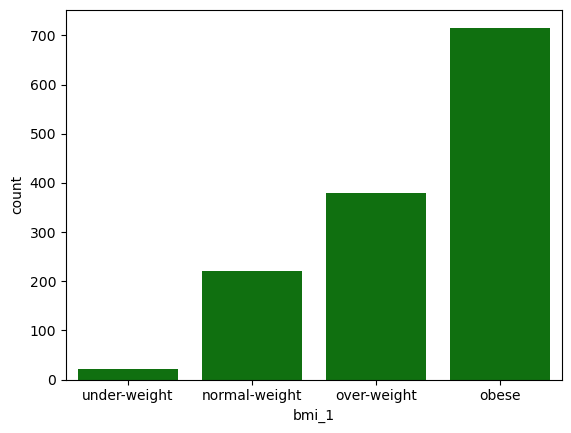

In [35]:
# Visualization the number of bmi_1
ax = sns.countplot (x='bmi_1', data=df,color='g')
print(df['bmi_1'].value_counts())

BMI Categories:-

Underweight: BMI is less than 18.5

Normal weight: BMI is 18.5 to 24.9

Overweight: BMI is 25 to 29.9

Obese: BMI is 30 or more

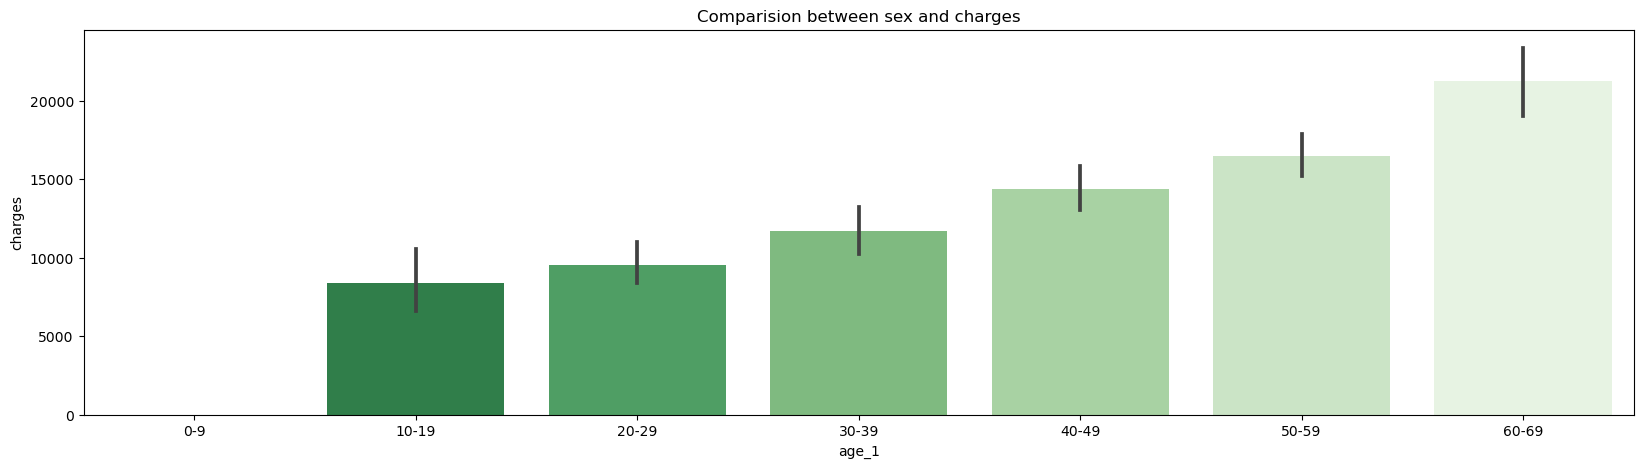

In [36]:
# Comparing age and charges
plot = plt.figure(figsize=(20,5))
plt.title("Comparision between sex and charges")
sns.barplot(x = "age_1", y = "charges", data = df, palette = 'Greens_r')
plt.show()

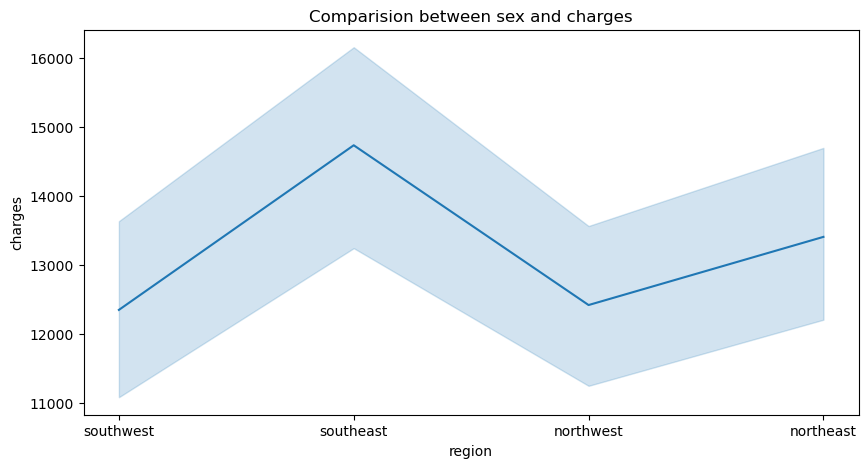

In [37]:
# Comparing sex and charges
plot = plt.figure(figsize=(10,5))
plt.title("Comparision between sex and charges")
sns.lineplot(data=df, x="region", y="charges", palette = 'Greens')
plt.show()

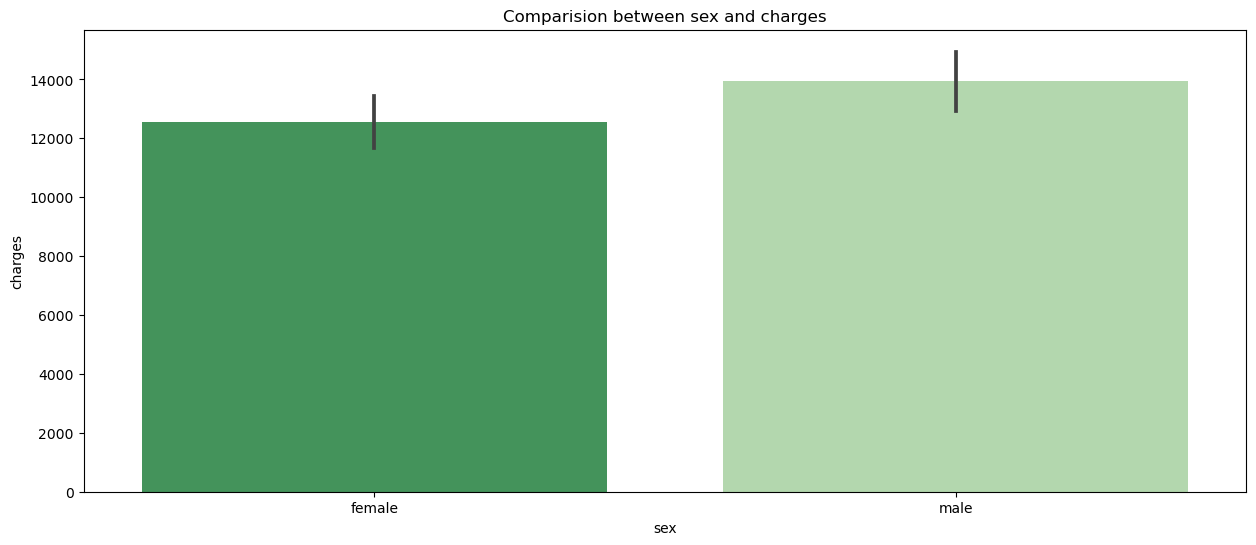

In [38]:
# Comparing sex and charges
plot = plt.figure(figsize=(15,6))
plt.title("Comparision between sex and charges")
sns.barplot( data = df, x = "sex", y = "charges", palette = 'Greens_r')
plt.show()

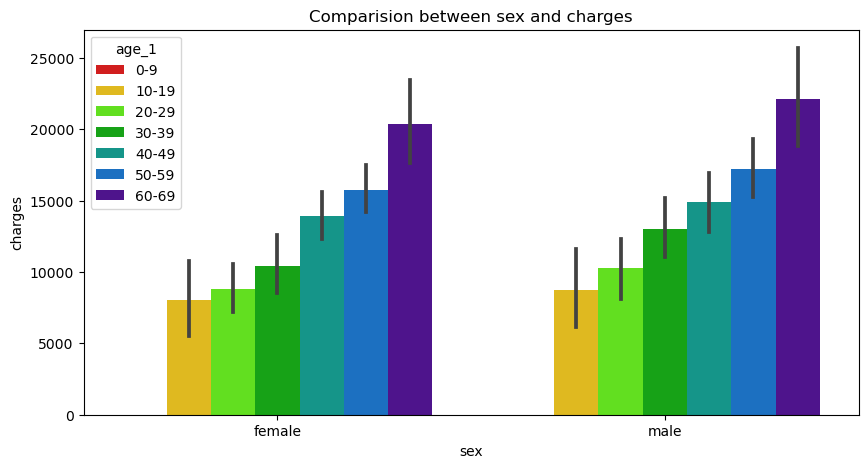

In [39]:
# Comparing sex and charges
plot = plt.figure(figsize=(10,5))
plt.title("Comparision between sex and charges")
sns.barplot(data=df, x="sex", y="charges", hue="age_1", palette = 'nipy_spectral_r')
plt.show()

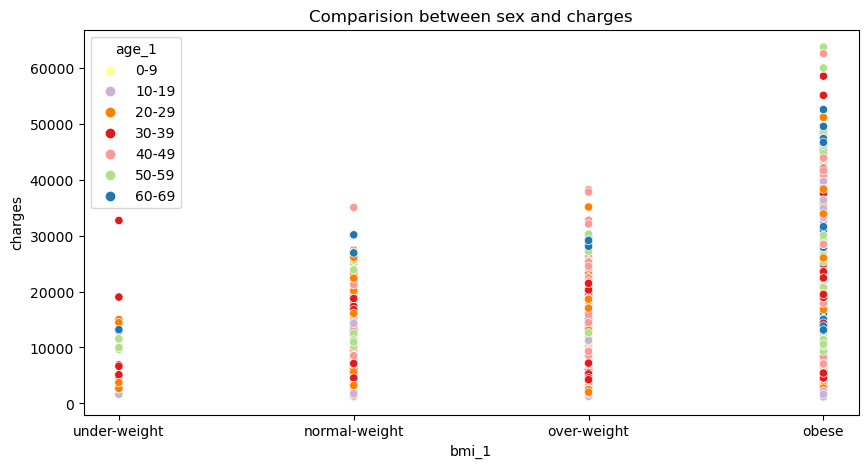

In [40]:
# Comparing bmi_1 and charges
plot = plt.figure(figsize=(10,5))
plt.title("Comparision between sex and charges")
sns.scatterplot(data=df, x="bmi_1", y="charges", hue="age_1", palette = 'Paired_r')
plt.show()

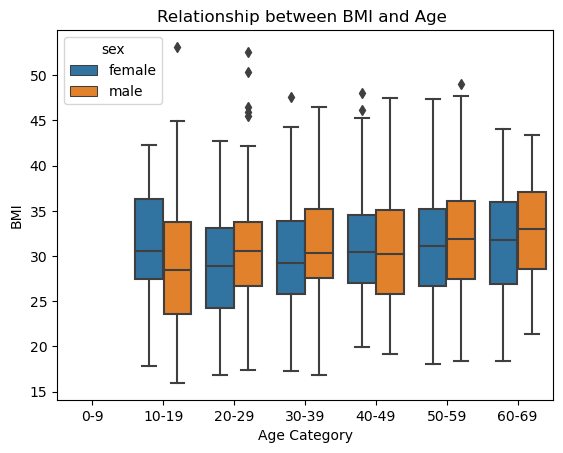

In [41]:
sns.boxplot(data=df, x='age_1', y='bmi', hue='sex', showfliers=True)
plt.ylabel("BMI")
plt.xlabel("Age Category")
plt.title("Relationship between BMI and Age ")

plt.show()

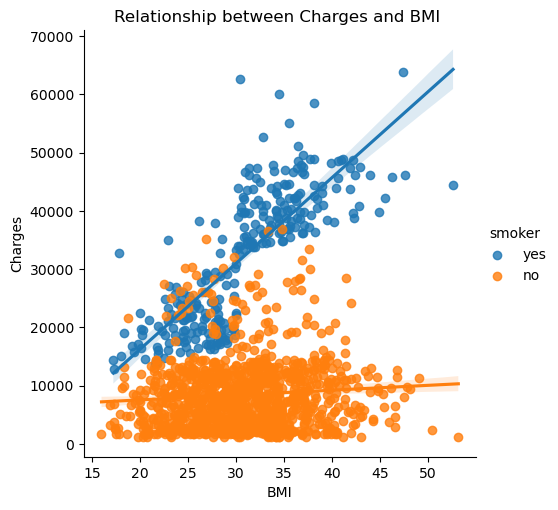

In [42]:
sns.lmplot(data=df,  x='bmi', y='charges', hue='smoker' )

plt.ylabel("Charges")
plt.xlabel("BMI")
plt.title("Relationship between Charges and BMI ")
plt.show()

We can observe there is a positive relation between BMI and Charges especially with smokers, and the relation for the non-smokers is less incremental


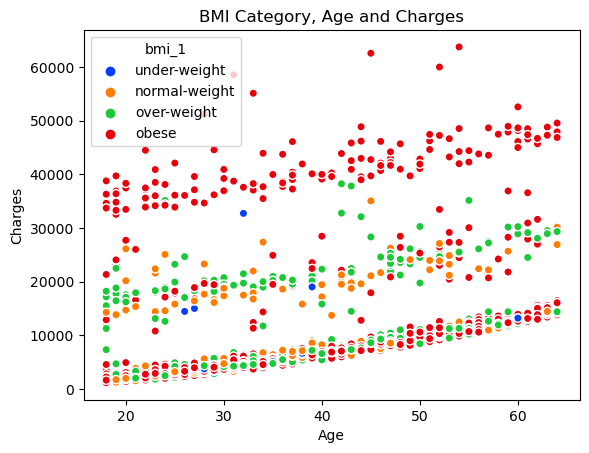

In [43]:
sns.scatterplot(x="age", y="charges", hue="bmi_1", data=df, linewidth=1, palette='bright')
plt.ylabel("Charges")
plt.xlabel("Age")
plt.title("BMI Category, Age and Charges")
plt.show()

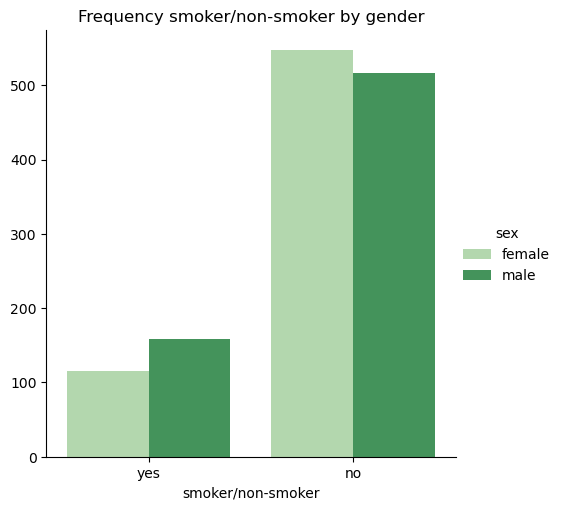

In [44]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="Greens", data=df)
plt.ylabel("")
plt.xlabel("smoker/non-smoker")
plt.title("Frequency smoker/non-smoker by gender")
plt.show()

The number of non-smoking patients is greater than smoking patients.

# Multivariate Analysis

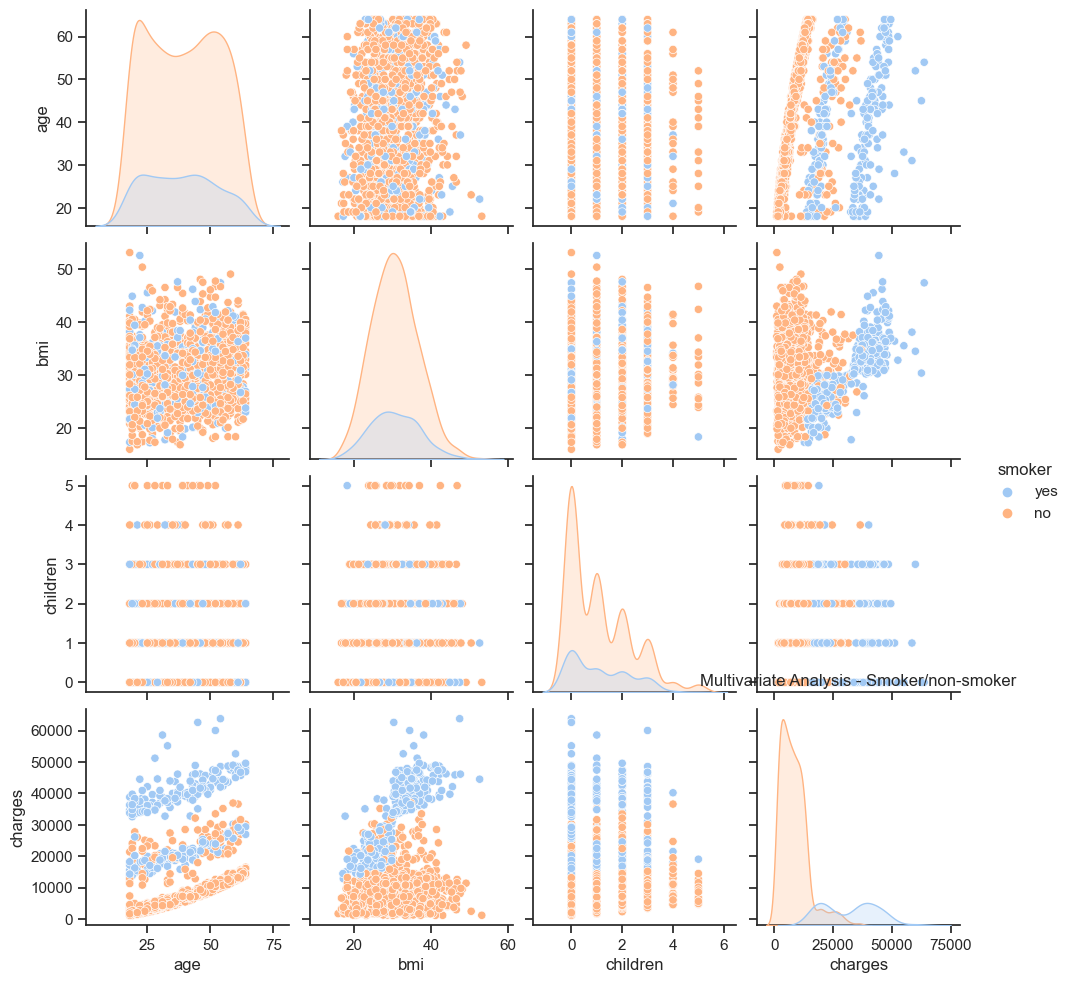

In [45]:
sns.set(style="ticks")
sns.pairplot(df.drop('charges_log', axis=1), hue="smoker", palette='pastel')

plt.title("Multivariate Analysis - Smoker/non-smoker")
plt.show()

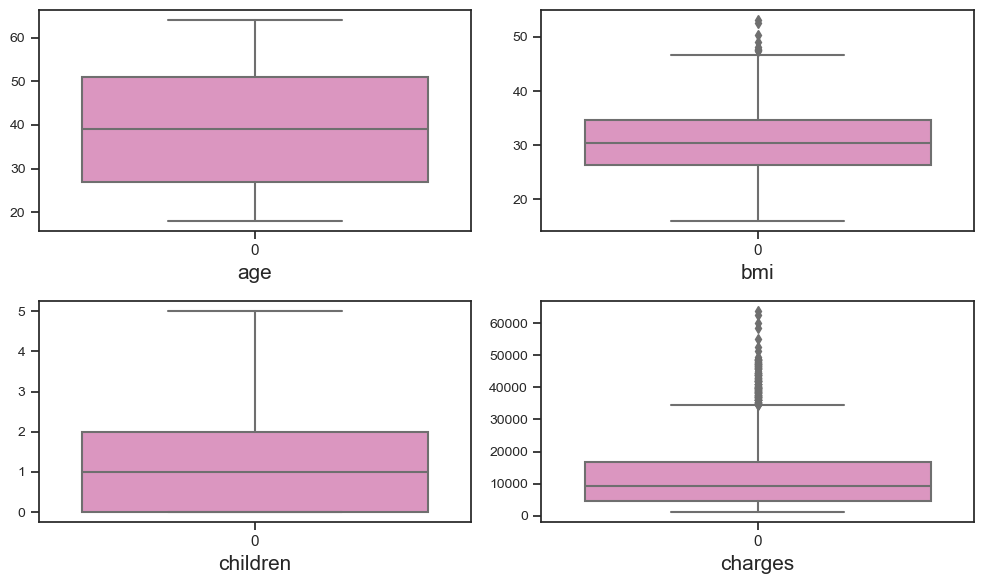

In [46]:
# Lets check the outliers by plotting boxplot

plt.figure(figsize = (10, 6), facecolor = "white")
plotnumber = 1
for col in num_col:
    if plotnumber<=4:
        ax = plt.subplot(2, 2, plotnumber)
        sns.boxplot(df[col], palette = "Set2_r")
        plt.xlabel(col, fontsize = 15)
        plt.yticks(rotation = 0, fontsize = 10)
    plotnumber+=1
plt.tight_layout()

In [47]:
# Encoding columns Sex and Smoker
encoding_dict = {'sex': {'male' : 0 , 'female' : 1} ,
                 'smoker': {'no': 0 , 'yes' : 1}
                 }

df_encoded = df.drop(['age_1'], axis = 1 )
df_encoded.replace(encoding_dict, inplace=True)

# One-Hot Encoding - column region
df_encoded = pd.get_dummies(df_encoded, columns=['region'], prefix=['r'])

# Arranging the columns
df_encoded = df_encoded[['age', 'sex', 'bmi', 'children', 'smoker',
       'r_northeast', 'r_northwest', 'r_southeast', 'r_southwest', 'charges', 'charges_log']]

df_encoded.head()

,age,sex,bmi,children,smoker,r_northeast,r_northwest,r_southeast,r_southwest,charges,charges_log
0,19,1,27.900,0,1,False,False,False,True,16884.92400,9.734176
1,18,0,33.770,1,0,False,False,True,False,1725.55230,7.453302
2,28,0,33.000,3,0,False,False,True,False,4449.46200,8.400538
3,33,0,22.705,0,0,False,True,False,False,21984.47061,9.998092
4,32,0,28.880,0,0,False,True,False,False,3866.85520,8.260197


In [48]:
df_encoded

,age,sex,bmi,children,smoker,r_northeast,r_northwest,r_southeast,r_southwest,charges,charges_log
0,19,1,27.900,0,1,False,False,False,True,16884.92400,9.734176
1,18,0,33.770,1,0,False,False,True,False,1725.55230,7.453302
2,28,0,33.000,3,0,False,False,True,False,4449.46200,8.400538
3,33,0,22.705,0,0,False,True,False,False,21984.47061,9.998092
4,32,0,28.880,0,0,False,True,False,False,3866.85520,8.260197
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,False,True,False,False,10600.54830,9.268661
1334,18,1,31.920,0,0,True,False,False,False,2205.98080,7.698927
1335,18,1,36.850,0,0,False,False,True,False,1629.83350,7.396233
1336,21,1,25.800,0,0,False,False,False,True,2007.94500,7.604867


Removing outliers

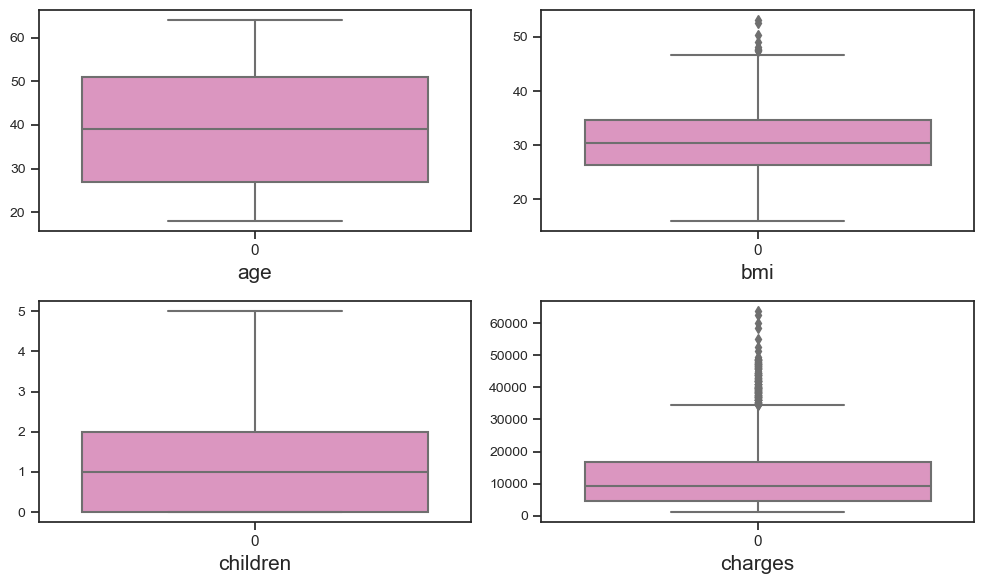

In [49]:
# Lets check the outliers by plotting boxplot

plt.figure(figsize = (10, 6), facecolor = "white")
plotnumber = 1
for col in num_col:
    if plotnumber<=4:
        ax = plt.subplot(2, 2, plotnumber)
        sns.boxplot(df[col], palette = "Set2_r")
        plt.xlabel(col, fontsize = 15)
        plt.yticks(rotation = 0, fontsize = 10)
    plotnumber+=1
plt.tight_layout()

In [50]:
from scipy.stats import zscore

# Exclude non-numerical columns before calculating Z-scores
numerical_columns = df_encoded.select_dtypes(include=['number']).columns
z = np.abs(zscore(df_encoded[numerical_columns]))
print(z)

           age       sex       bmi  children    smoker   charges  charges_log
0     1.438764  1.010519  0.453320  0.908614  1.970587  0.298584     0.691394
1     1.509965  0.989591  0.509621  0.078767  0.507463  0.953689     1.790020
2     0.797954  0.989591  0.383307  1.580926  0.507463  0.728675     0.759500
3     0.441948  0.989591  1.305531  0.908614  0.507463  0.719843     0.978513
4     0.513149  0.989591  0.292556  0.908614  0.507463  0.776802     0.912181
...        ...       ...       ...       ...       ...       ...          ...
1333  0.768473  0.989591  0.050297  1.580926  0.507463  0.220551     0.184949
1334  1.509965  1.010519  0.206139  0.908614  0.507463  0.914002     1.522799
1335  1.509965  1.010519  1.014878  0.908614  0.507463  0.961596     1.852106
1336  1.296362  1.010519  0.797813  0.908614  0.507463  0.930362     1.625129
1337  1.551686  1.010519  0.261388  0.908614  1.970587  1.311053     1.285113

[1338 rows x 7 columns]


In [51]:
df_new = df_encoded[(z.iloc[:,:9]<3).all(axis=1)]

print(f"{df_encoded.shape[0] - df_new.shape[0]} rows with outliers were deleted.")
print(f"This represent {round((df_encoded.shape[0] - df_new.shape[0]) / df_encoded.shape[0] *100, 2)}% of the data.")
print(f"In the new dataset there are {df_new.shape[0]} rows and {df_encoded.shape[1]} columns.")
df_encoded = df_new
df_encoded

29 rows with outliers were deleted.
This represent 2.17% of the data.
In the new dataset there are 1309 rows and 11 columns.


,age,sex,bmi,children,smoker,r_northeast,r_northwest,r_southeast,r_southwest,charges,charges_log
0,19,1,27.900,0,1,False,False,False,True,16884.92400,9.734176
1,18,0,33.770,1,0,False,False,True,False,1725.55230,7.453302
2,28,0,33.000,3,0,False,False,True,False,4449.46200,8.400538
3,33,0,22.705,0,0,False,True,False,False,21984.47061,9.998092
4,32,0,28.880,0,0,False,True,False,False,3866.85520,8.260197
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,False,True,False,False,10600.54830,9.268661
1334,18,1,31.920,0,0,True,False,False,False,2205.98080,7.698927
1335,18,1,36.850,0,0,False,False,True,False,1629.83350,7.396233
1336,21,1,25.800,0,0,False,False,False,True,2007.94500,7.604867


# Correlation

In [52]:
# Checking the correlation between features and the target.
cor = df_encoded.drop(['charges_log'], axis = 1).corr()
cor

,age,sex,bmi,children,smoker,r_northeast,r_northwest,r_southeast,r_southwest,charges
age,1.000000,0.019253,0.118178,0.059100,-0.029090,0.004564,-0.003449,-0.014346,0.013766,0.305263
sex,0.019253,1.000000,-0.042498,-0.014056,-0.079058,0.003042,0.006602,-0.013987,0.004798,-0.059455
bmi,0.118178,-0.042498,1.000000,0.029916,-0.005288,-0.137201,-0.134342,0.261014,0.002552,0.191453
children,0.059100,-0.014056,0.029916,1.000000,0.028844,-0.018062,0.044948,-0.027381,0.001275,0.100438
smoker,-0.029090,-0.079058,-0.005288,0.028844,1.000000,0.005387,-0.040557,0.071776,-0.039005,0.785129
r_northeast,0.004564,0.003042,-0.137201,-0.018062,0.005387,1.000000,-0.324897,-0.344979,-0.320213,0.011435
r_northwest,-0.003449,0.006602,-0.134342,0.044948,-0.040557,-0.324897,1.000000,-0.346405,-0.321537,-0.045847
r_southeast,-0.014346,-0.013987,0.261014,-0.027381,0.071776,-0.344979,-0.346405,1.000000,-0.341411,0.074829
r_southwest,0.013766,0.004798,0.002552,0.001275,-0.039005,-0.320213,-0.321537,-0.341411,1.000000,-0.042922
charges,0.305263,-0.059455,0.191453,0.100438,0.785129,0.011435,-0.045847,0.074829,-0.042922,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

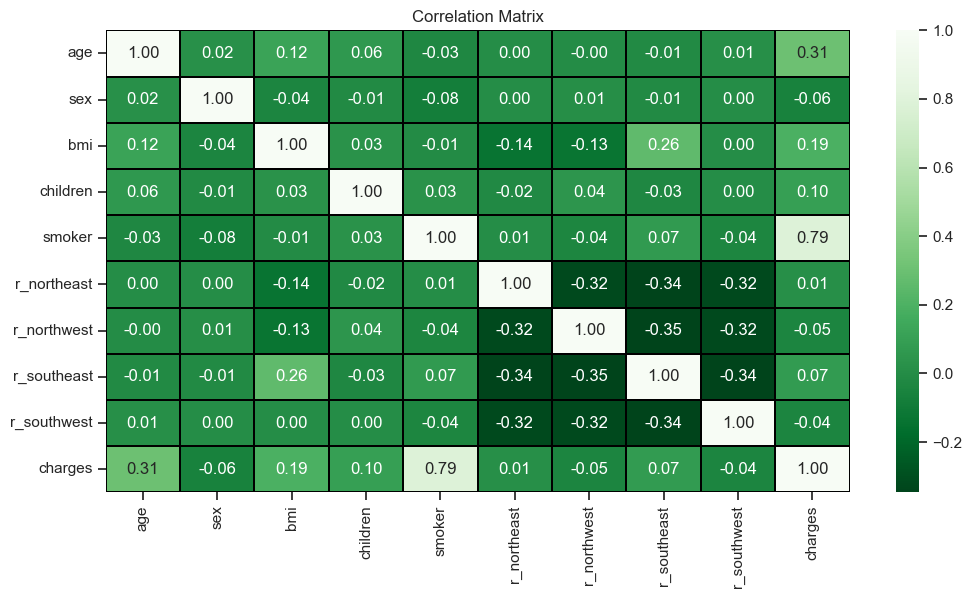

In [53]:
# Visualizing the Correlation Matrix
plt.figure(figsize=(12,6))
sns.heatmap(cor,annot=True,fmt='0.2f', linewidth=0.2, cmap='Greens_r',linecolor='black')
plt.title('Correlation Matrix')

In [54]:
cor['charges'].sort_values(ascending = False).to_frame()

,charges
charges,1.000000
smoker,0.785129
age,0.305263
bmi,0.191453
children,0.100438
r_southeast,0.074829
r_northeast,0.011435
r_southwest,-0.042922
r_northwest,-0.045847
sex,-0.059455


The target have a strong positive correlation with smoker variable

In [55]:
#Droping the columns with less correlation with target variable
df_encoded.drop(['children', 'sex','r_southeast', 'r_northeast', 'r_southwest', 'r_northwest'], axis=1, inplace=True)

In [56]:
df_encoded.head()

,age,bmi,smoker,charges,charges_log
0,19,27.900,1,16884.92400,9.734176
1,18,33.770,0,1725.55230,7.453302
2,28,33.000,0,4449.46200,8.400538
3,33,22.705,0,21984.47061,9.998092
4,32,28.880,0,3866.85520,8.260197


In [57]:
df_encoded.skew().sort_values(ascending=False)

smoker         1.482731
charges        1.437160
bmi            0.191432
age            0.051340
charges_log   -0.107363
dtype: float64

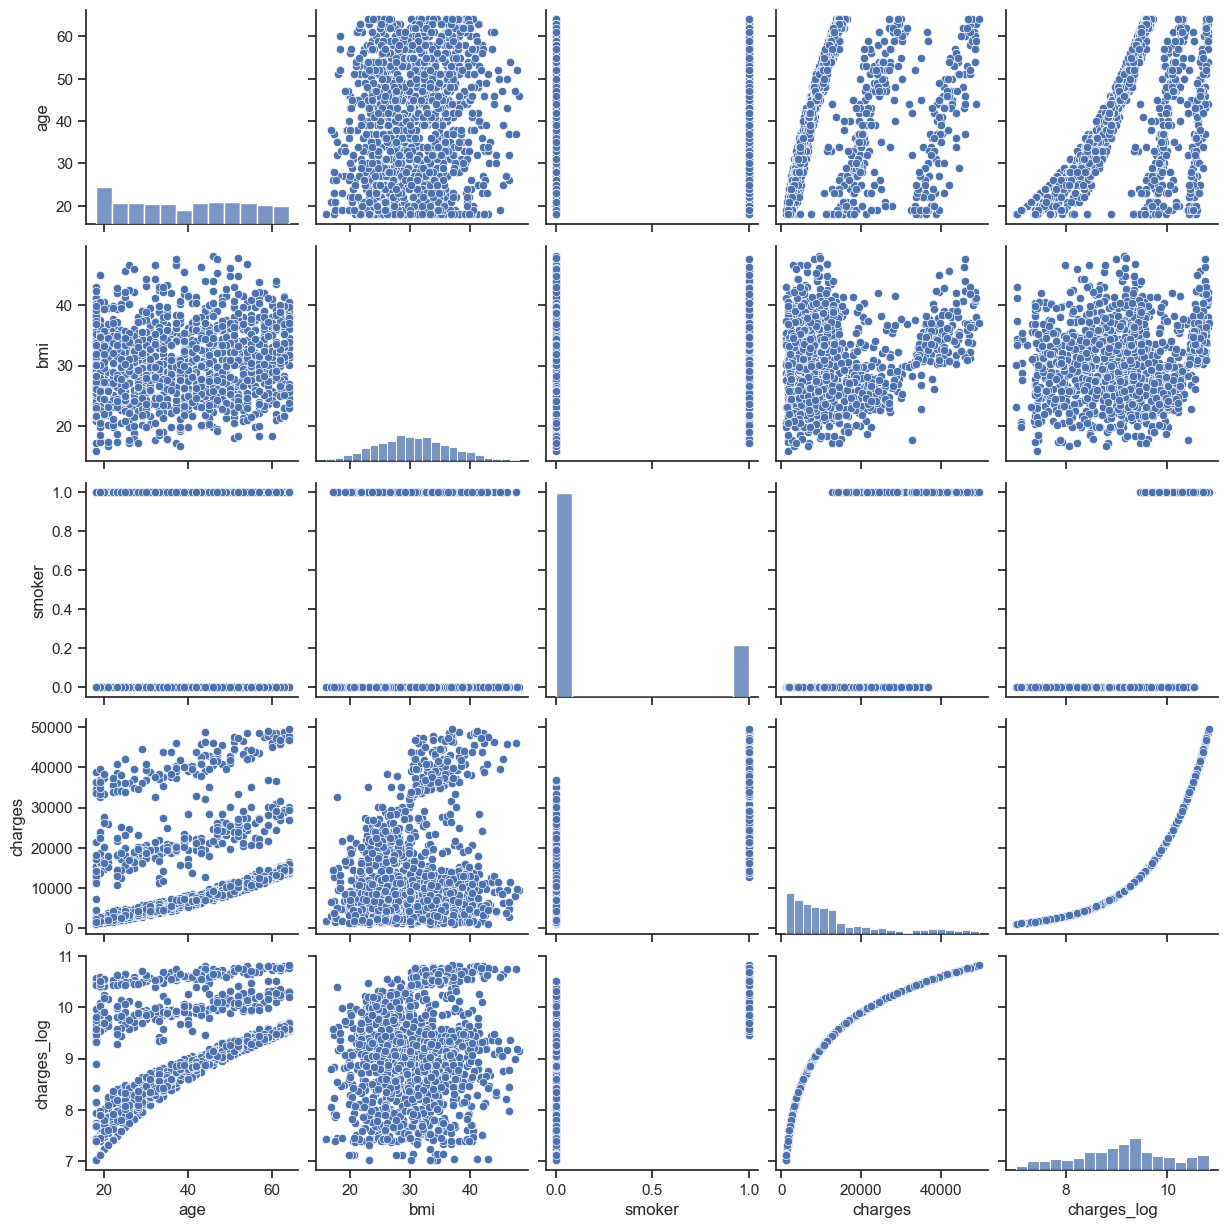

In [63]:
sns.pairplot(df_encoded)

# Separating features and label

In [58]:
x = df_encoded.drop(['charges', 'charges_log'], axis = 1)
y = df_encoded['charges_log']

Feature Scaling using Standard Scalarization

In [59]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

,age,bmi,smoker
0,-1.439063,-0.449359,1.984848
1,-1.510086,0.533391,-0.503817
2,-0.799859,0.404478,-0.503817
3,-0.444746,-1.319101,-0.503817
4,-0.515769,-0.285288,-0.503817
...,...,...,...
1304,0.762639,0.064617,-0.503817
1305,-1.510086,0.223666,-0.503817
1306,-1.510086,1.049041,-0.503817
1307,-1.297018,-0.800939,-0.503817


We have scaled the data using the Standard Scalarization method to overcome the issue of biases

# Checking Variance Inflation Factor (VIF)

In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF values'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif.sort_values(by='VIF values', ascending=False)

,Features,VIF values
0,age,1.014998
1,bmi,1.014167
2,smoker,1.000850


# Modeling

# Creating train test split

In [61]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=145)
print("x_train shape: ", x_train.shape)
print("x_test shape:  ", x_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape:  ", y_test.shape)

x_train shape:  (916, 3)
x_test shape:   (393, 3)
y_train shape:  (916,)
y_test shape:   (393,)


In [88]:
# Regression algorithms
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso, Ridge

from sklearn.metrics import r2_score, mean_squared_error ,mean_absolute_error
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression


Linear Regression

In [68]:
Lin_reg_model = LinearRegression()
Lin_reg_model.fit(x_train, y_train)

print('Intercept:', Lin_reg_model.intercept_)
print('Coefficients:', Lin_reg_model.coef_)

Intercept: 9.094435874338808
Coefficients: [0.49216726 0.05549593 0.62997654]


In [106]:
LR = LinearRegression()
LR.fit(x_train,y_train)
lr_pred = LR.predict(x_test)
pred_train = LR.predict(x_train)
print('R2_score: ', r2_score(y_test, pred_LR))
print('R2_score on training Data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, lr_pred))
print('Mean Squared Error:', mean_squared_error(y_test, lr_pred))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test, lr_pred)))

R2_score:  0.7127662321111368
R2_score on training Data: 75.34901418360568
Mean Absolute Error: 0.3200691708165887
Mean Squared Error: 0.24196942794830797
Root mean squared error: 0.4919038808022437


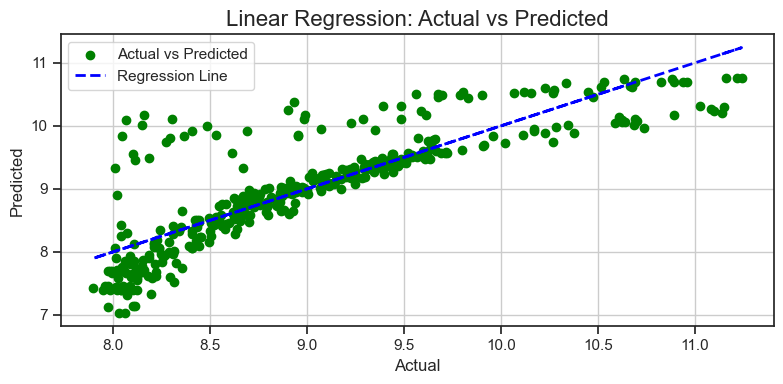

In [107]:
plt.figure(figsize=(8, 4))
plt.scatter(x=lr_pred, y=y_test, color='green', marker='o', label='Actual vs Predicted')
plt.plot(lr_pred, lr_pred, color='blue', linestyle='--', linewidth=2, label='Regression Line')
plt.xlabel('Actual', fontsize=12)
plt.ylabel('Predicted', fontsize=12)
plt.title('Linear Regression: Actual vs Predicted', fontsize=16)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

KNeighborsRegressor

In [108]:
kn= KNN()
kn.fit(x_train,y_train)
kn_pred = kn.predict(x_test)
pred_train = kn.predict(x_train)
print('R2_score: ', r2_score(y_test, kn_pred))
print('R2_score on training Data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, kn_pred))
print('Mean Squared Error:', mean_squared_error(y_test, kn_pred))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test, kn_pred)))

R2_score:  0.7077659248346015
R2_score on training Data: 85.238231465465
Mean Absolute Error: 0.27873016669147904
Mean Squared Error: 0.2461817512421943
Root mean squared error: 0.4961670598117073


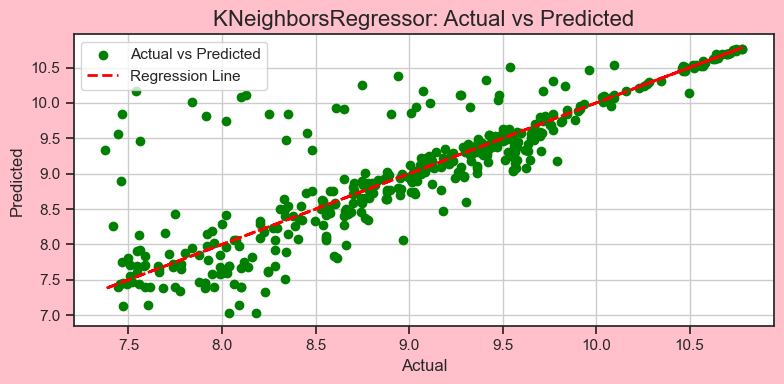

In [115]:
plt.figure(figsize=(8, 4),facecolor='pink')
plt.scatter(x=kn_pred, y=y_test, color='green', marker='o', label='Actual vs Predicted')
plt.plot(kn_pred, kn_pred, color='red', linestyle='--', linewidth=2, label='Regression Line')
plt.xlabel('Actual', fontsize=12)
plt.ylabel('Predicted', fontsize=12)
plt.title('KNeighborsRegressor: Actual vs Predicted', fontsize=16)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

RandomForestRegressor

In [118]:
RN = RandomForestRegressor()
RN.fit(x_train,y_train)
rn_pred = RN.predict(x_test)
pred_train = RN.predict(x_train)
print('R2_score: ', r2_score(y_test, rn_pred))
print('R2_score on training Data:', r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, rn_pred))
print('Mean Squared Error:', mean_squared_error(y_test, rn_pred))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test, rn_pred)))

R2_score:  0.687198833786958
R2_score on training Data: 96.5095785293115
Mean Absolute Error: 0.28346312780679783
Mean Squared Error: 0.2635077338101096
Root mean squared error: 0.5133300437438955


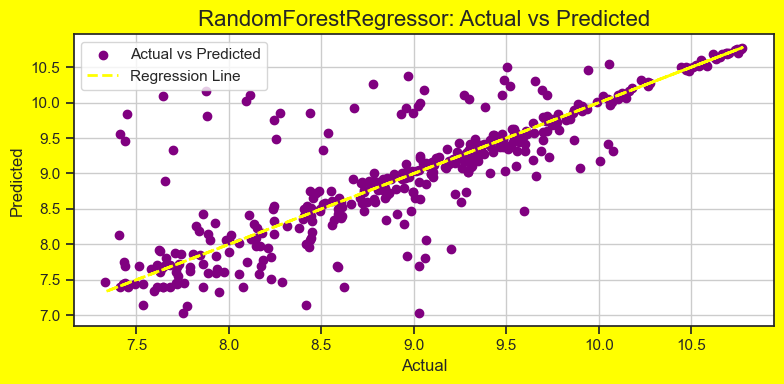

In [127]:
plt.figure(figsize=(8, 4),facecolor='yellow')
plt.scatter(x=rn_pred, y=y_test, color='purple', marker='o', label='Actual vs Predicted')
plt.plot(rn_pred, rn_pred, color='yellow', linestyle='--', linewidth=2, label='Regression Line')
plt.xlabel('Actual', fontsize=12)
plt.ylabel('Predicted', fontsize=12)
plt.title('RandomForestRegressor: Actual vs Predicted', fontsize=16)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

GradientBoostingRegressor

In [128]:
GBR = GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred_GBR = GBR.predict(x_test)
pred_train = GBR.predict(x_train)
print('R2_score: ', r2_score(y_test, pred_GBR))
print('R2_score on training Data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_GBR))
print('Mean Squared Error:', mean_squared_error(y_test, pred_GBR))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test, pred_GBR)))

R2_score:  0.7500298837999974
R2_score on training Data: 87.41219426418789
Mean Absolute Error: 0.2502911363550476
Mean Squared Error: 0.21057804751038076
Root mean squared error: 0.4588878376143573


In [129]:
lasso = Lasso()
lasso.fit(x_train,y_train)
pred_lasso = lasso.predict(x_test)
pred_train = lasso.predict(x_train)
print('R2_score: ', r2_score(y_test, pred_lasso))
print('R2_score on training Data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_lasso))
print('Mean Squared Error:', mean_squared_error(y_test, pred_lasso))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test, pred_lasso)))

R2_score:  -0.02044097723438343
R2_score on training Data: 0.0
Mean Absolute Error: 0.7547826263551891
Mean Squared Error: 0.8596326307008337
Root mean squared error: 0.9271637561406473


In [130]:
rd = Ridge()
rd.fit(x_train,y_train)
pred_rd = rd.predict(x_test)
pred_train = rd.predict(x_train)
print('R2_score: ', r2_score(y_test, pred_rd))
print('R2_score on training Data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_rd))
print('Mean Squared Error:', mean_squared_error(y_test, pred_rd))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test, pred_rd)))

R2_score:  0.7128106388224997
R2_score on training Data: 75.34891846897135
Mean Absolute Error: 0.32012951293092684
Mean Squared Error: 0.24193201916234056
Root mean squared error: 0.49186585484493694


DecisionTreeRegressor

In [131]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_dtr = dtr.predict(x_test)
pred_train = dtr.predict(x_train)
print('R2_score: ', r2_score(y_test, pred_dtr))
print('R2_score on training Data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_dtr))
print('Mean Squared Error:', mean_squared_error(y_test, pred_dtr))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test, pred_dtr)))

R2_score:  0.4804046558506838
R2_score on training Data: 99.82124481069341
Mean Absolute Error: 0.34964074139876616
Mean Squared Error: 0.43771381447414065
Root mean squared error: 0.6615994365733247


In [133]:
ev_model = pd.DataFrame(columns=['Model', 'RMSE', 'R2_Score(test)', 'CV_Mean'])

In [135]:
lm = LinearRegression()
lm.fit(x_train, y_train)

print("LR coef_        :", lm.coef_)
print("\nLR intercept_ :", lm.intercept_)
print("LR score train  :", lm.score(x_train, y_train))
print("LR score test   :", lm.score(x_test, y_test))

# Predict the value
y_pred = lm.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(lm, x, y, cv=10, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = r2_score(y_test, y_pred)
r_mse = np.sqrt(mse)


print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

model_scores = {'Model': lm, 'RMSE': r_mse, 'R2_Score(test)':r2_score_val, 'CV_Mean': scores.mean() }
ev_model = pd.concat([ev_model, pd.DataFrame(model_scores, index=[0])], ignore_index=True)

LR coef_        : [0.49216726 0.05549593 0.62997654]

LR intercept_ : 9.094435874338808
LR score train  : 0.7534901418360568
LR score test   : 0.7127662321111368
Mean squared error: 0.2420
Root Mean squared error: 0.4919
Cross-validation results (R2): [0.81449129 0.75916705 0.67331659 0.67425308 0.76121174 0.81974597
 0.82125815 0.65095339 0.64986397 0.7510248 ]
Average R2: 0.7375
R2_Score(test): 0.7128


In [136]:
# Create the decision tree regression model
dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(x_train, y_train)


y_pred = dtr.predict(x_test)


scores = cross_val_score(dtr, x, y, cv=5, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = dtr.score(x_test, y_test)
r_mse = np.sqrt(mse)

print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

model_scores = {'Model': dtr, 'RMSE': r_mse, 'R2_Score(test)':r2_score_val, 'CV_Mean': scores.mean() }
ev_model = pd.concat([ev_model, pd.DataFrame(model_scores, index=[0])], ignore_index=True)

Mean squared error: 0.4318
Root Mean squared error: 0.6571
Cross-validation results (R2): [0.61277028 0.49112553 0.59179175 0.61254284 0.54156721]
Average R2: 0.5700
R2_Score(test): 0.4875


In [140]:
%%time
rfr = RandomForestRegressor()
parameters = {'n_estimators': [100, 600, 1000],
              'max_features': ["sqrt"],  # Changed 'auto' to 'sqrt'
              'max_depth': [None, 40, 50, 60],
              'min_samples_split': [5, 7, 9],
              'min_samples_leaf': [7, 10, 12],
              'criterion': ['squared_error'],  # Change 'mse' to 'squared_error'
              'bootstrap': [True, False]}

grid_cv = GridSearchCV(estimator=rfr, param_grid=parameters, cv=5, n_jobs=-1)
grid_cv.fit(x_train, y_train)

CPU times: total: 2.27 s
Wall time: 3min 2s


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['squared_error'],
                         'max_depth': [None, 40, 50, 60],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [7, 10, 12],
                         'min_samples_split': [5, 7, 9],
                         'n_estimators': [100, 600, 1000]})

In [142]:
# Initialize eval_model DataFrame with column names
ev_model = pd.DataFrame(columns=['Model', 'RMSE', 'R2_Score(test)', 'CV_Mean'])

In [143]:
# Obtain best parameters, best estimator, and best score from grid search
best_params = grid_cv.best_params_
best_estimator = grid_cv.best_estimator_
best_score = grid_cv.best_score_

print(f"Best parameters : {best_params}")
print(f"Best score : {best_score}")
print("Best Estimator: ", best_estimator)

Best parameters : {'bootstrap': True, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 7, 'min_samples_split': 5, 'n_estimators': 100}
Best score : 0.7985781719341907
Best Estimator:  RandomForestRegressor(max_features='sqrt', min_samples_leaf=7,
                      min_samples_split=5)


In [144]:
# Predict the values using the best estimator
y_pred = best_estimator.predict(x_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2_score_test = best_estimator.score(x_test, y_test)
r_mse = np.sqrt(mse)

In [145]:
print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {best_score}")
print(f"Average R2: {best_score.mean():.4f}")
print(f"R2_Score(test): {r2_score_test:.4f}")

Mean squared error: 0.2087
Root Mean squared error: 0.4569
Cross-validation results (R2): 0.7985781719341907
Average R2: 0.7986
R2_Score(test): 0.7522


In [146]:
# Initialize eval_model DataFrame with column names
eval_model_columns = ['Model', 'RMSE', 'R2_Score(test)', 'CV_Mean']
eval_model = pd.DataFrame(columns=eval_model_columns)

In [147]:
# Append model scores to eval_model
model_scores = {'Model': str(best_estimator), 'RMSE': r_mse, 'R2_Score(test)': r2_score_test, 'CV_Mean': best_score}

eval_model = pd.concat([eval_model, pd.DataFrame(model_scores, index=[0])], ignore_index=True)

In [148]:
eval_model

,Model,RMSE,R2_Score(test),CV_Mean
0,"RandomForestRegressor(max_features='sqrt', min...",0.456891,0.7522,0.798578


# Conclusion:

Above is a comparative result of the performance of the regression models applied. Among which the best option is the  with RandomForestRegressor  with max feature 'sqrt' selected parameters.


Saving the model

In [161]:
#Save the Best Model
import joblib

joblib.dump(best_estimator, 'best_random_forest_model.pkl')

['best_random_forest_model.pkl']

In [162]:
# Load the Model for Future Predictions
loaded_model = joblib.load('best_random_forest_model.pkl')
predictions = loaded_model.predict(x_train)
predictions

array([ 9.05683035,  9.80822164,  8.97845252, 10.21496368,  9.54026653,
        9.72756394,  9.29245476,  8.39770492,  9.53479753,  9.17369976,
        7.93115902,  8.41234025,  8.93731479,  8.23079955,  9.42778692,
        9.51282722,  9.23937368, 10.4049665 ,  8.50866768,  9.18126885,
        9.02070724,  8.42259455,  9.47250246,  8.40918315,  8.49546698,
        8.01187042, 10.01795849, 10.06299633,  8.95472975,  9.14059784,
        7.85393214,  9.99762708,  7.84074605,  8.43301919,  9.2027028 ,
        9.57055366,  9.56589239,  8.51319464,  8.48181458,  9.52866804,
        8.76474994,  9.59809607,  9.08808504, 10.1117644 ,  8.52653163,
        9.3895444 ,  8.66358409,  9.63852888,  8.33757909,  8.51226491,
        9.10583977,  8.39849849,  7.85681947,  8.36748385,  9.53611194,
        9.47293478,  8.2594413 ,  8.41718517,  9.2509439 , 10.37258468,
        9.19929208,  9.34420294,  9.95689542,  9.13096124,  7.73911243,
        8.24229619,  8.92970946,  9.58031433,  9.24244472, 10.28

comments

These are the predicted values for the medical cost  dataset to compared the prediction with the test data.


-------------------------------------------------------------------------Completed------------------------------------------------------------------------------------

if here need any improvement or i ussed wrong approad wrong method so please suggest me where i make mistake.. Your feedback will be very valuable for me it will help to improve and progress my python knowledge. Thanks